In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



# Start

In [3]:
! pip list

Package                                Version        Editable project location
-------------------------------------- -------------- -------------------------
absl-py                                1.4.0
accelerate                             0.12.0
access                                 1.1.9
affine                                 2.4.0
aiobotocore                            2.5.0
aiofiles                               22.1.0
aiohttp                                3.8.4
aiohttp-cors                           0.7.0
aioitertools                           0.11.0
aiorwlock                              1.3.0
aiosignal                              1.3.1
aiosqlite                              0.19.0
albumentations                         1.3.1
alembic                                1.11.1
altair                                 5.0.1
annoy                                  1.17.2
ansiwrap                               0.8.4
anyio                                  3.6.2
apache-beam             

In [4]:
train = pd.read_csv("/kaggle/input/banking-dataset-marketing-targets/train.csv",sep=";")
train


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets?sort=votes

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
! pip install sweetviz
import  sweetviz as sv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 52.8 MB/s eta 0:00:0000:0100:01


/opt/conda/lib/python3.10/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/opt/conda/lib/python3.10/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/opt/conda/lib/python3.10/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/opt/conda/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/opt/conda/lib/python3.10/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/opt/conda/lib/python3.10/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/opt/conda/lib/python3.10/site-packages/sweetviz/series_analyzer_cat.py:28


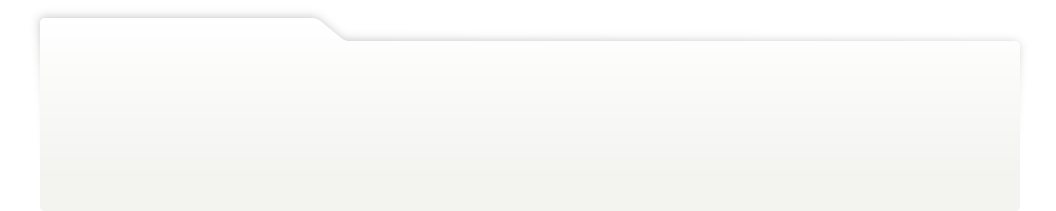
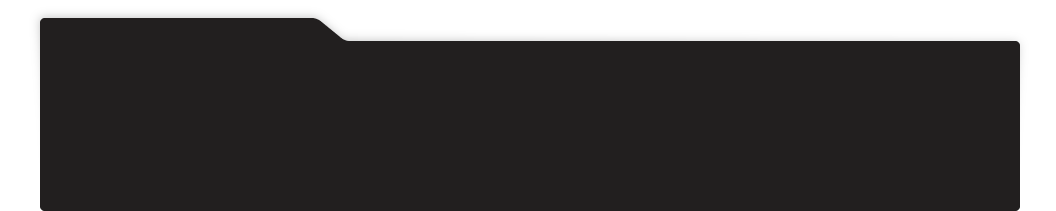
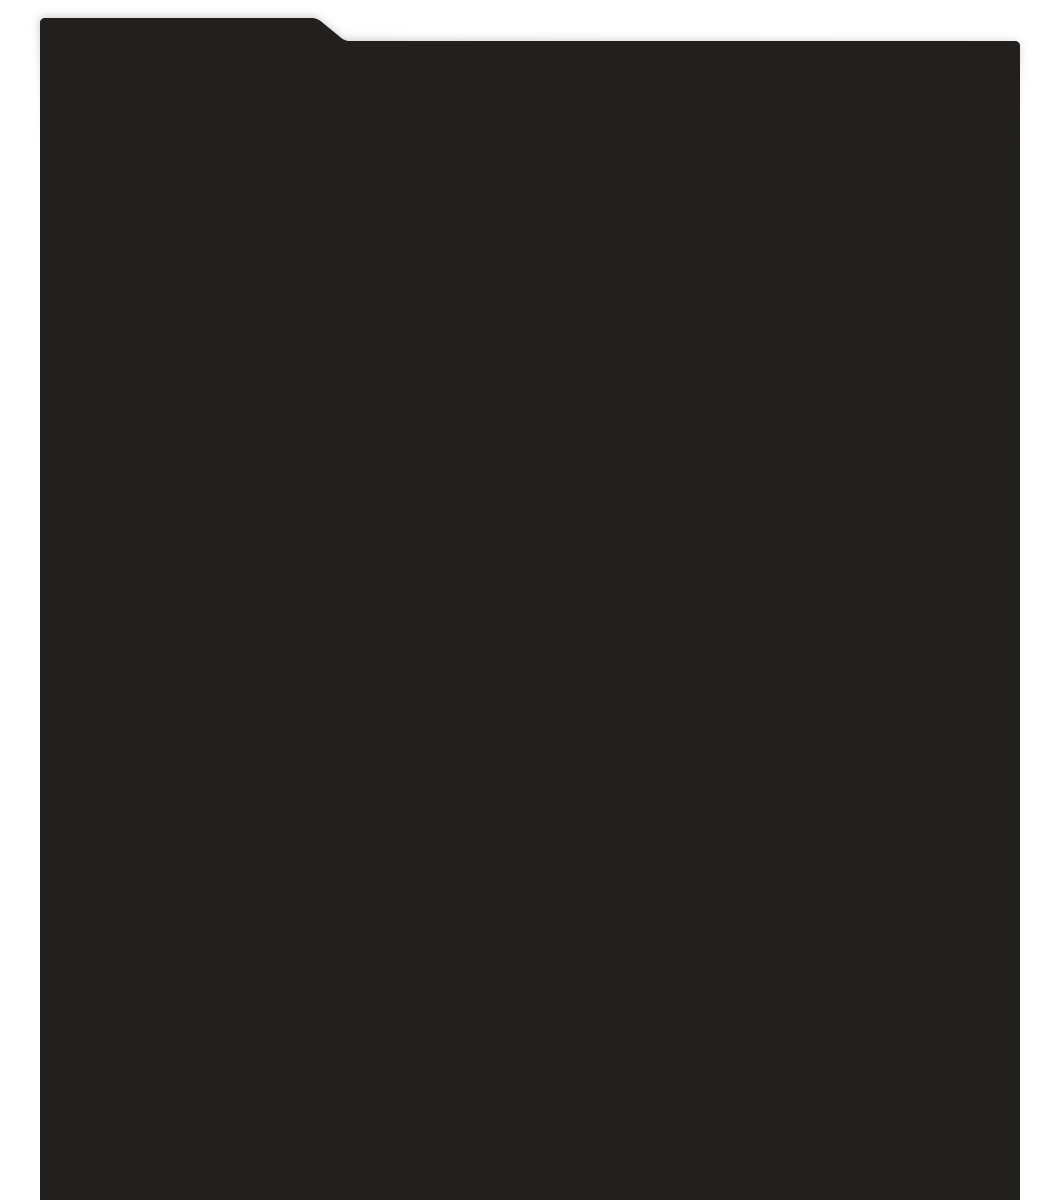
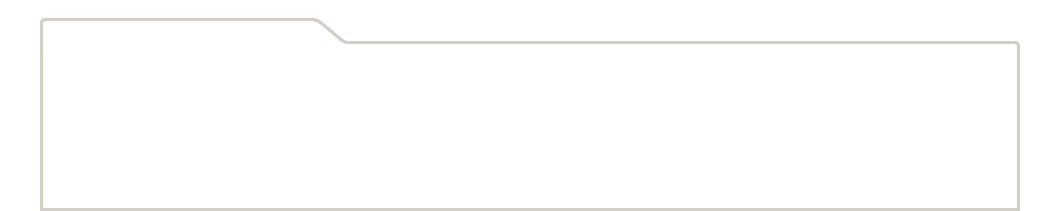
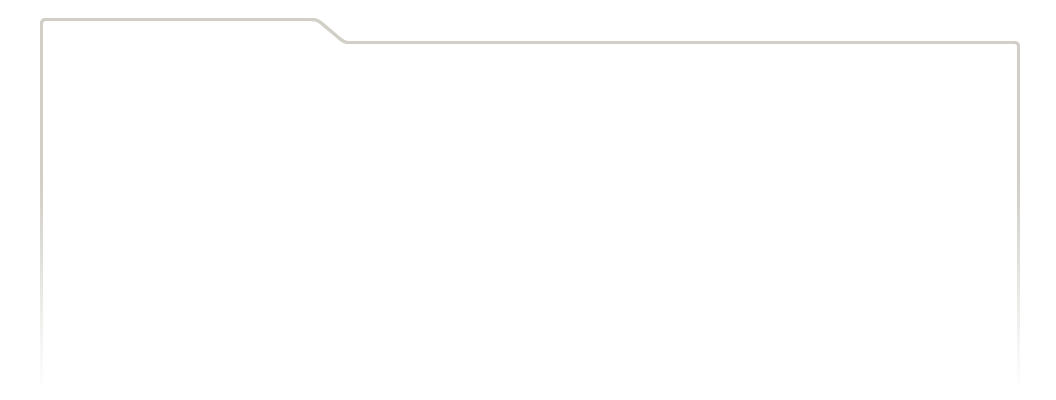
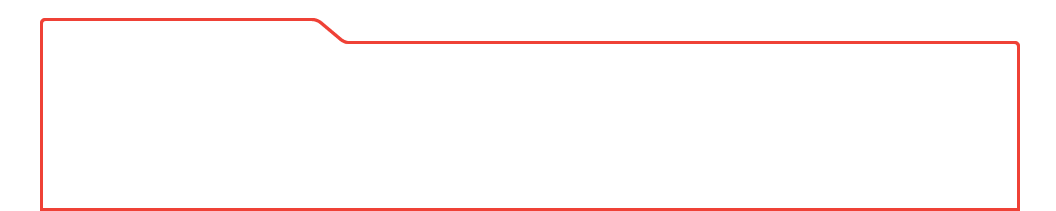
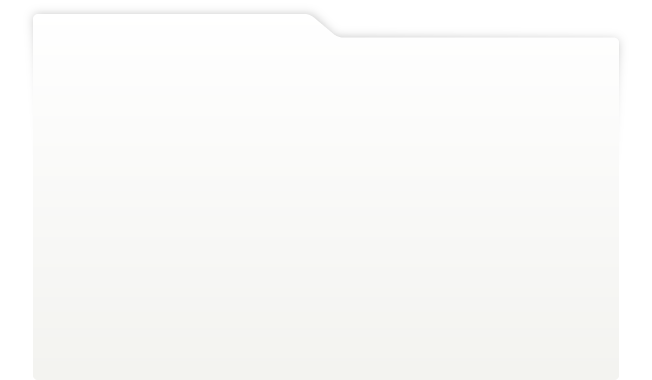
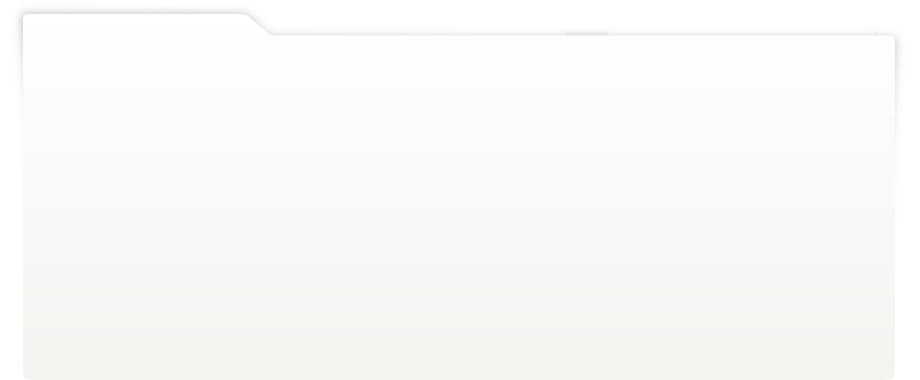
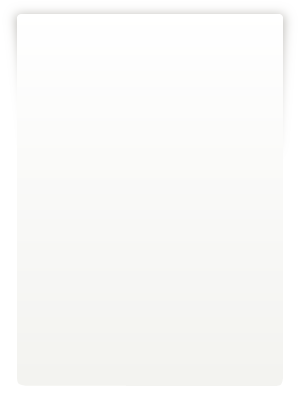
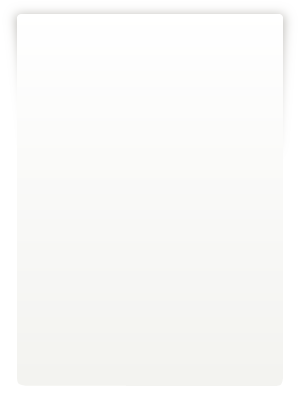
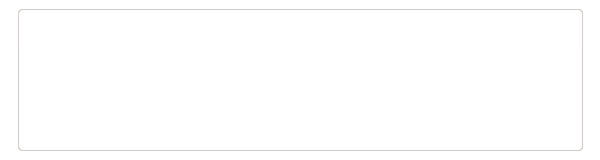
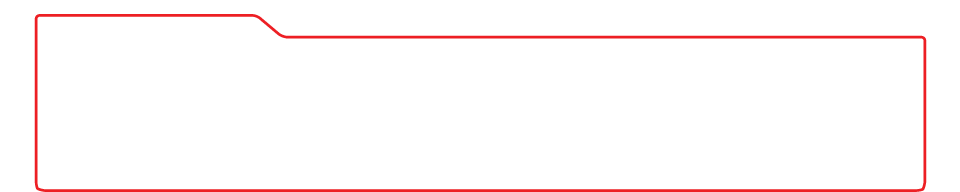
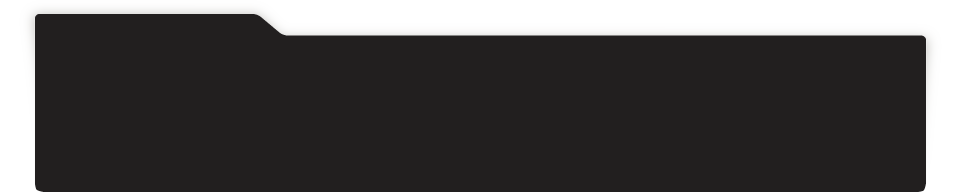
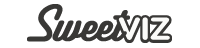
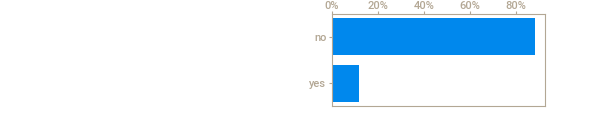
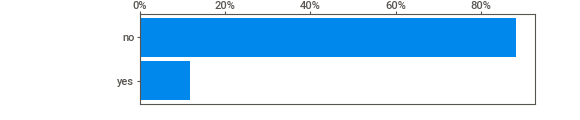
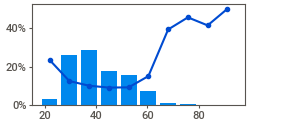
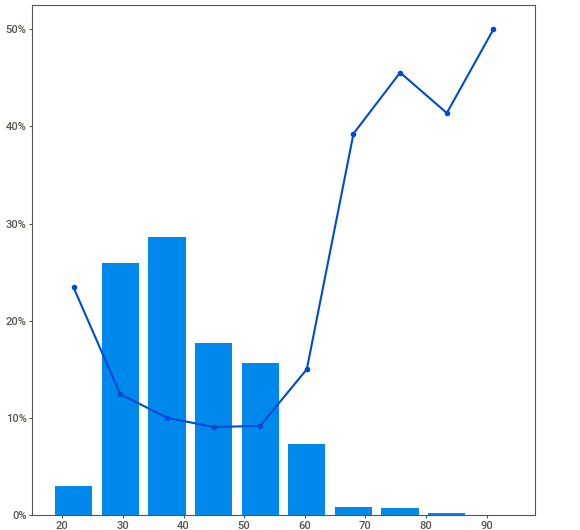
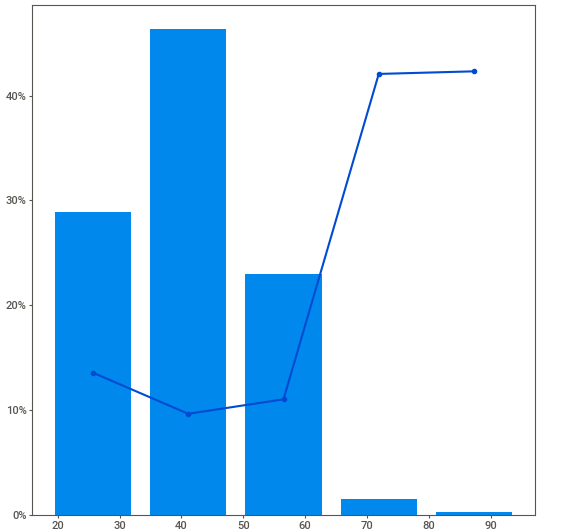
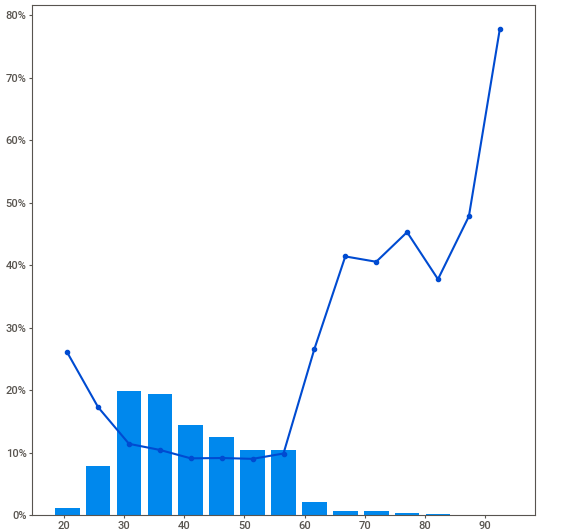
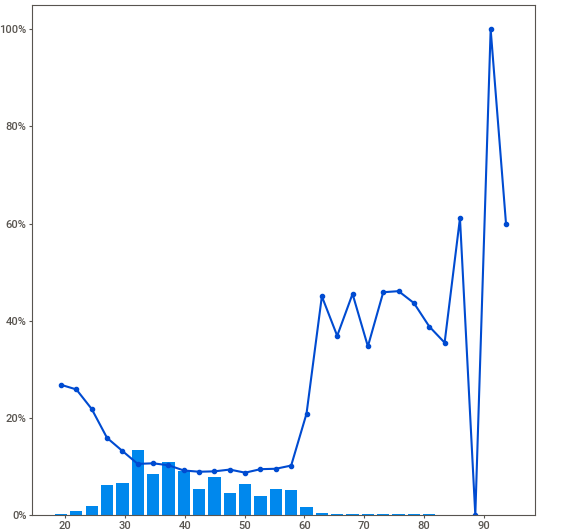
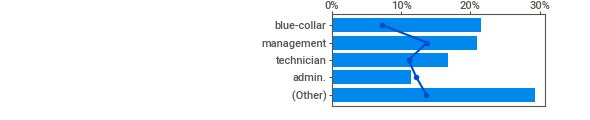
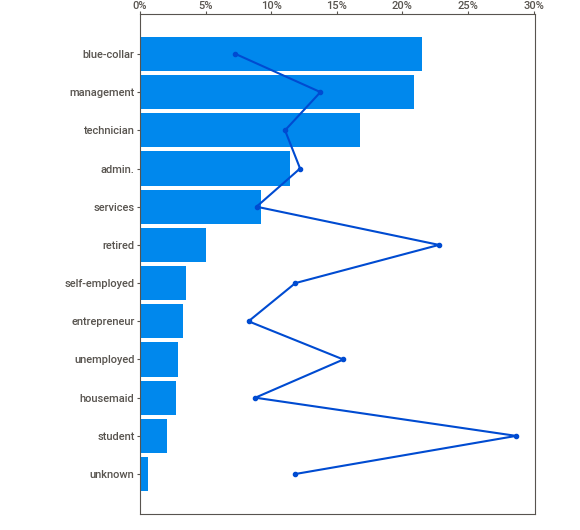
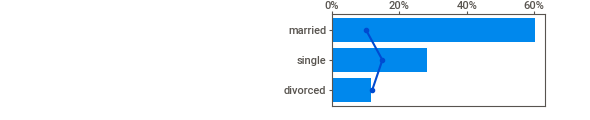
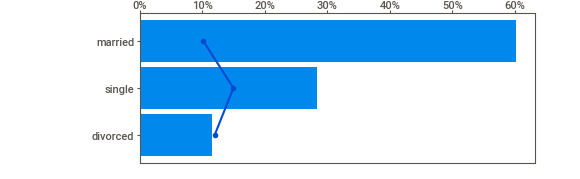
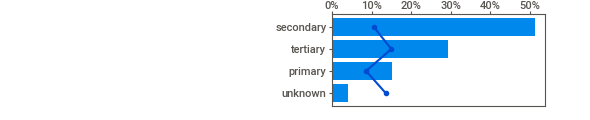
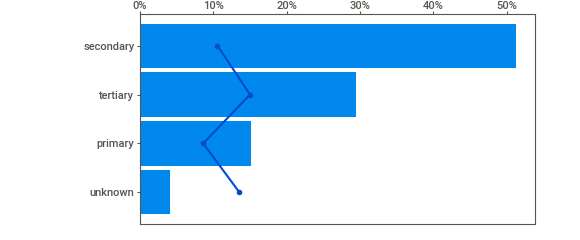
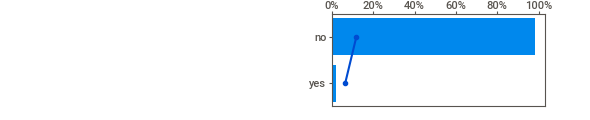
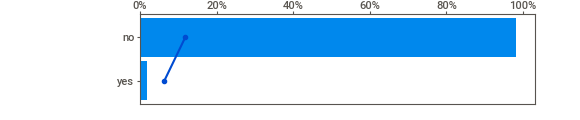
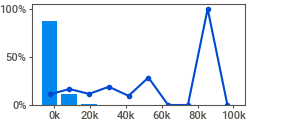
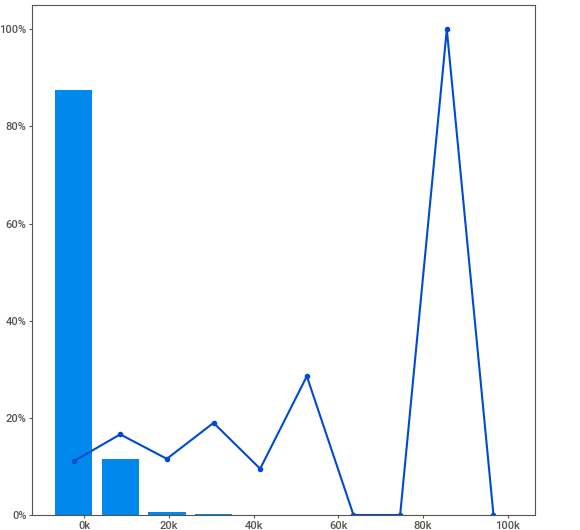
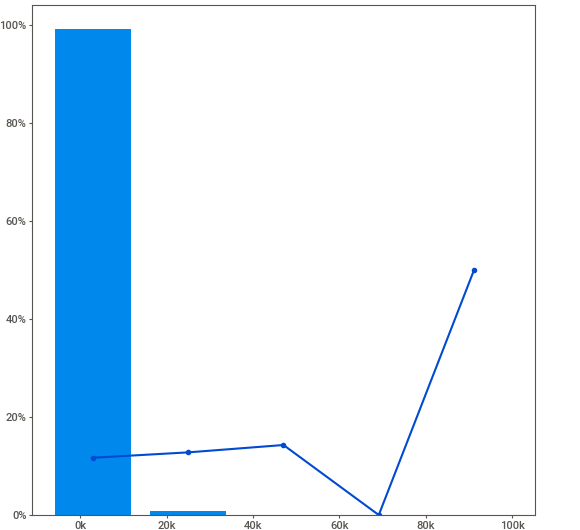
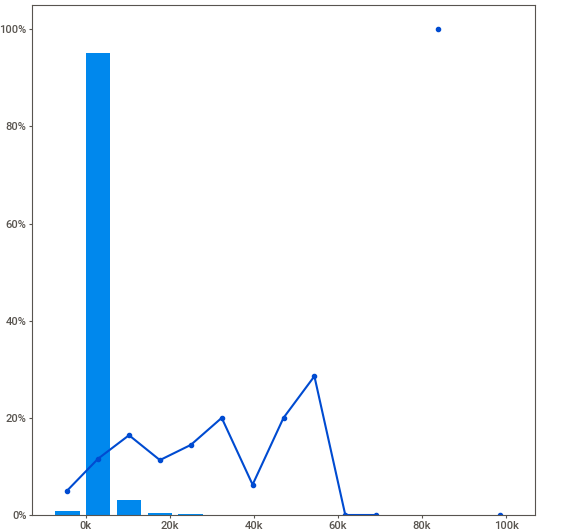
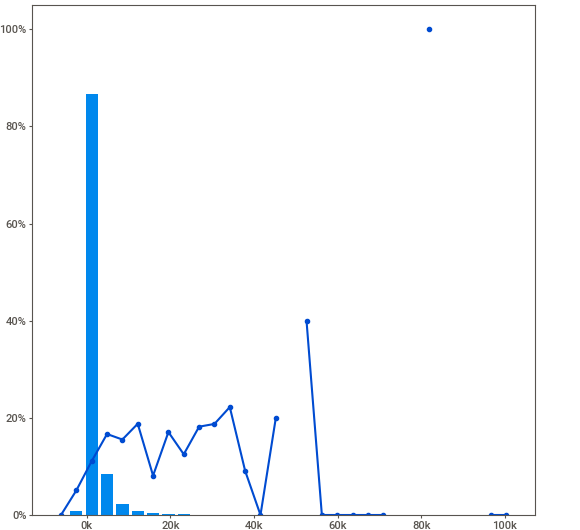
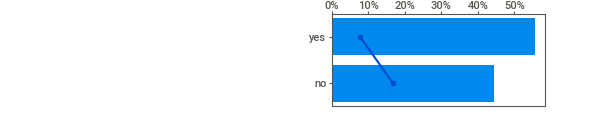
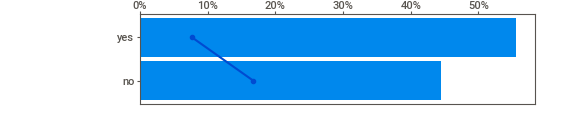
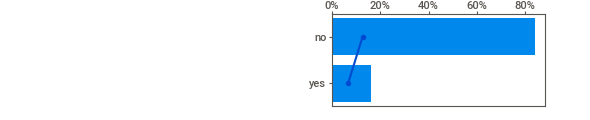
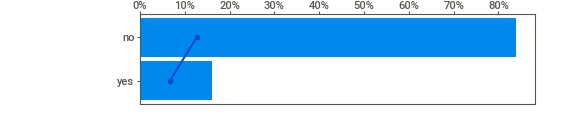
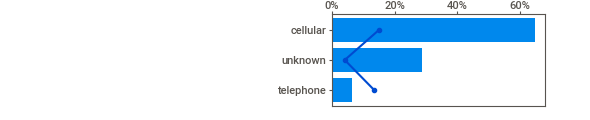
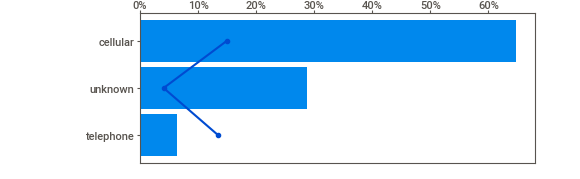
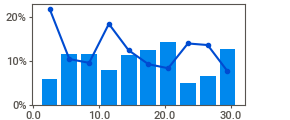
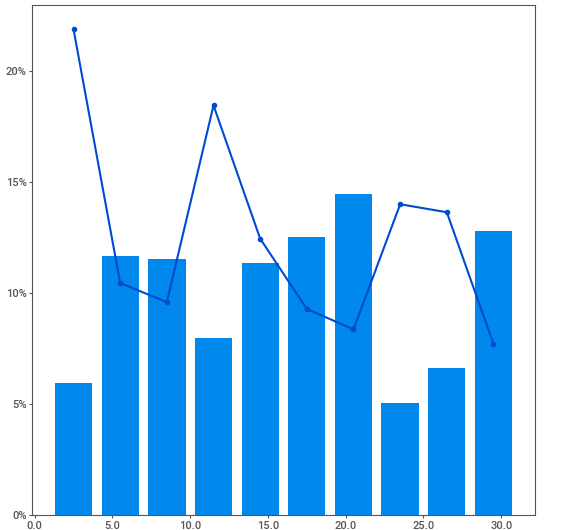
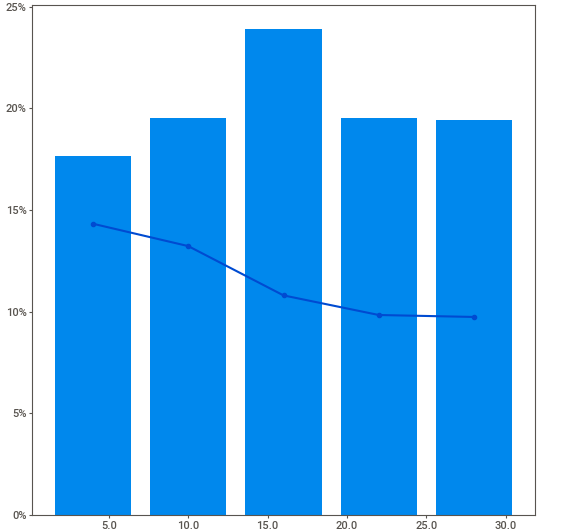
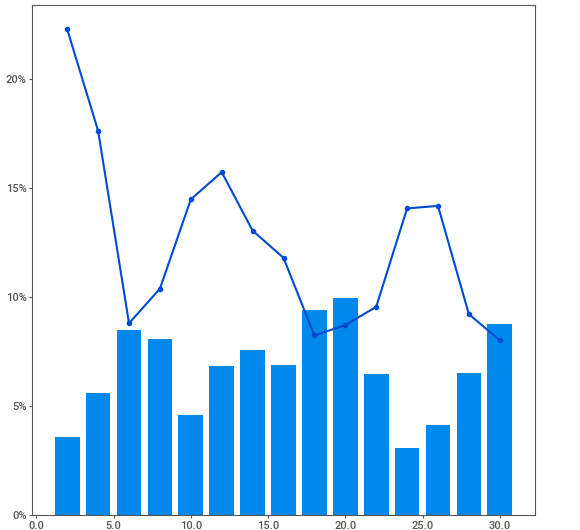
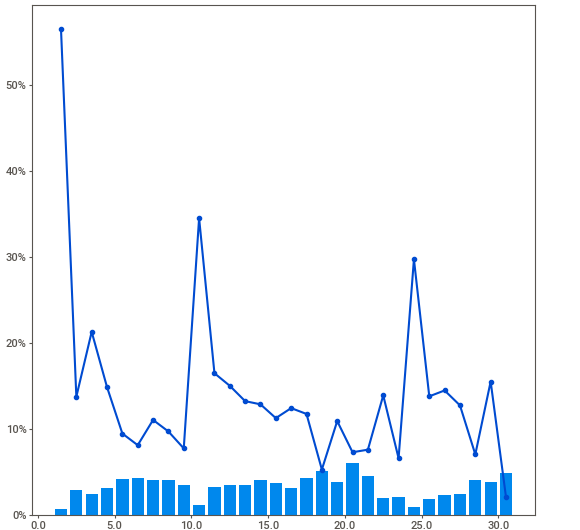
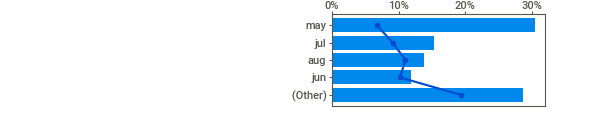
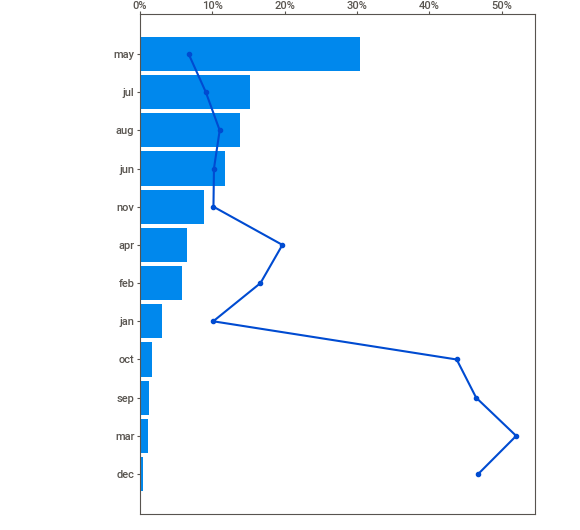
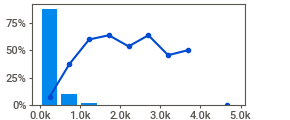
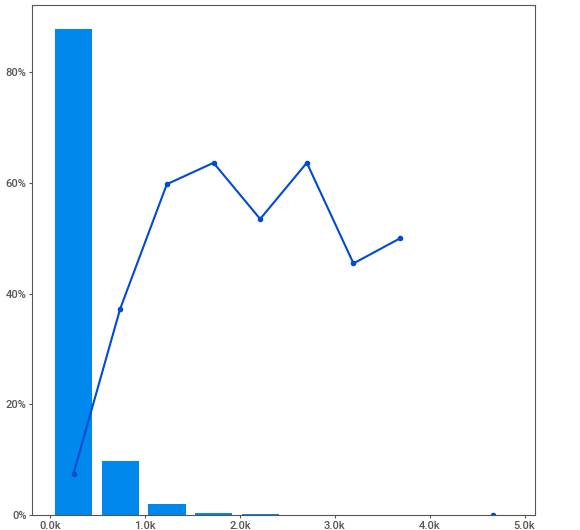
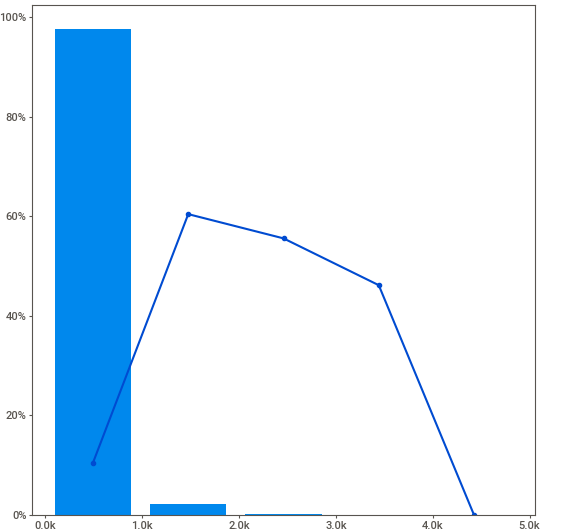
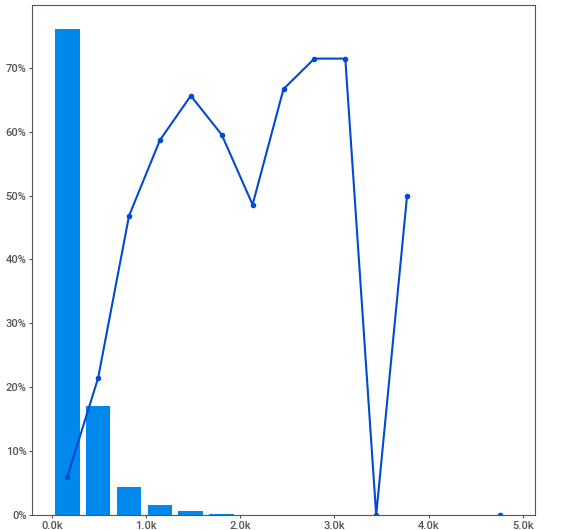
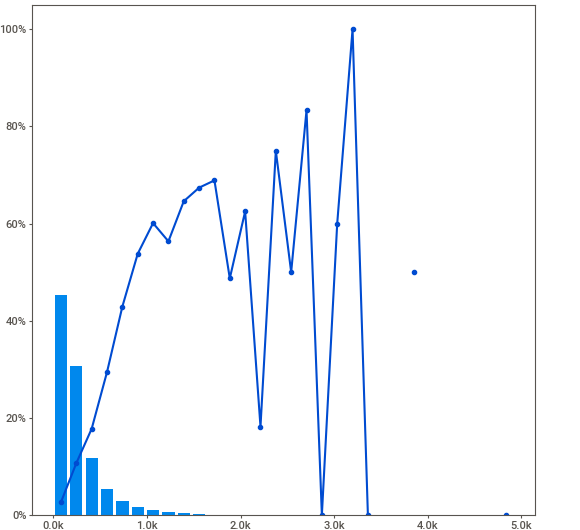
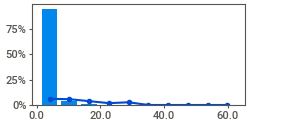
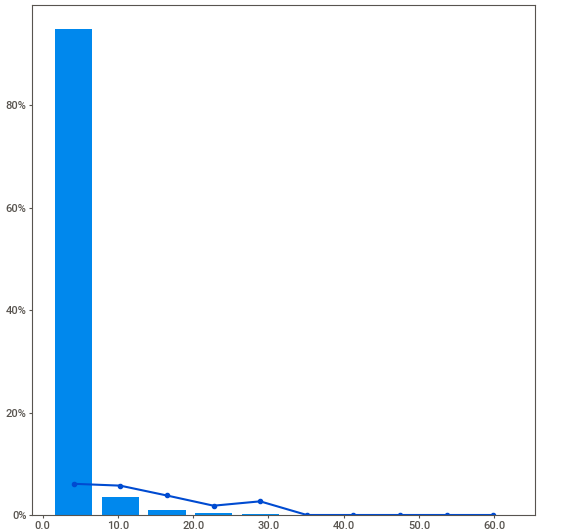
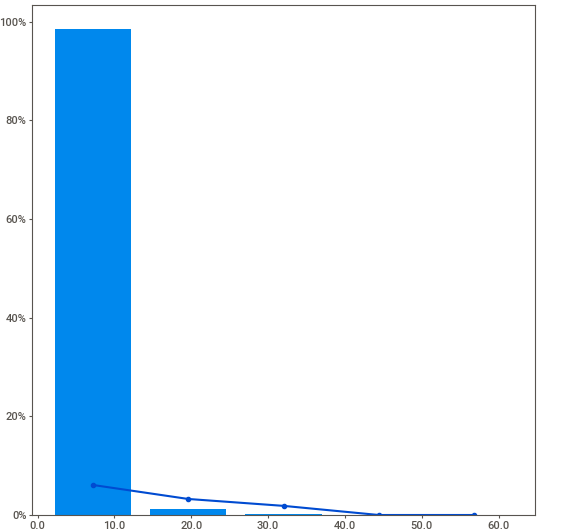
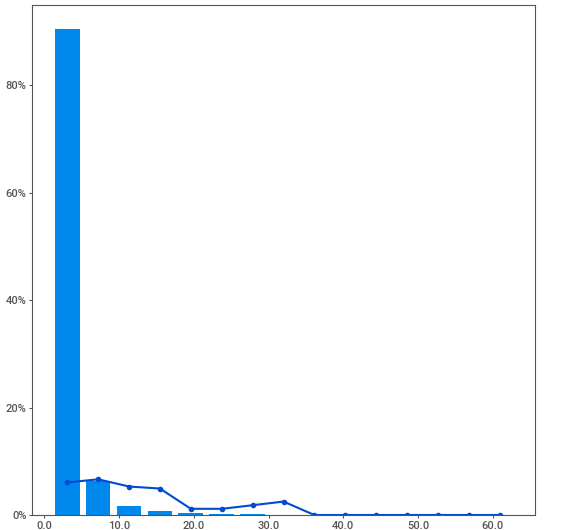
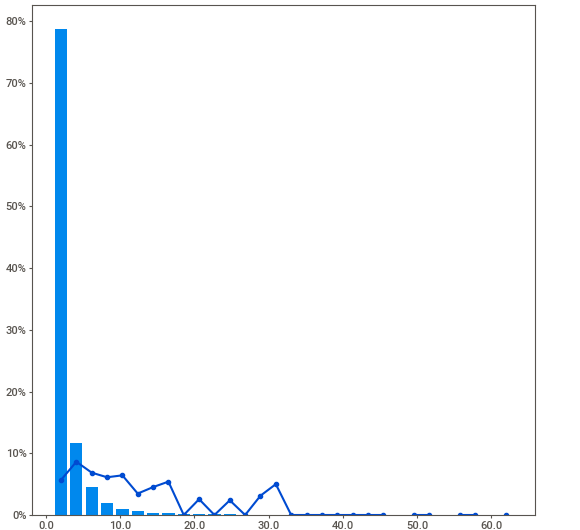
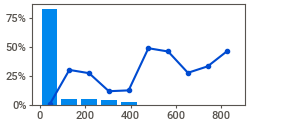
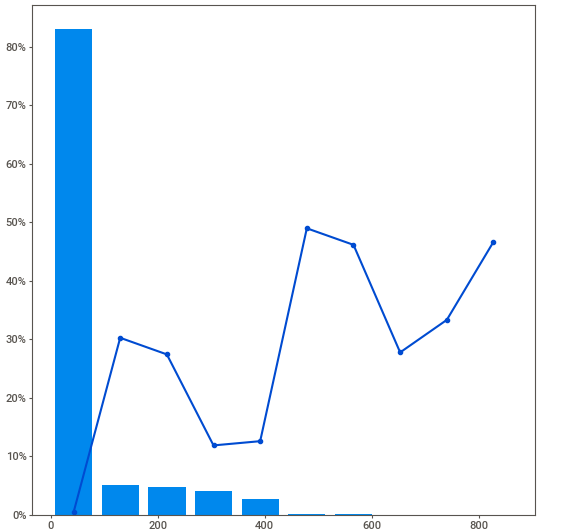
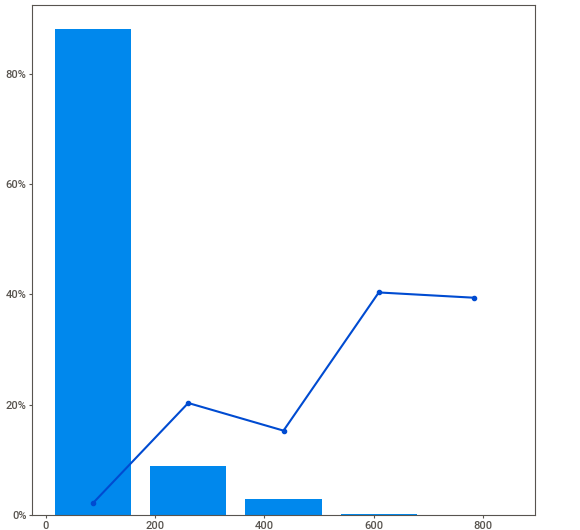
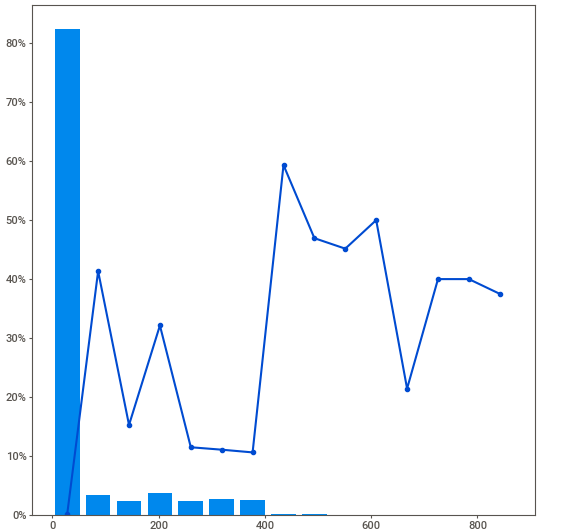
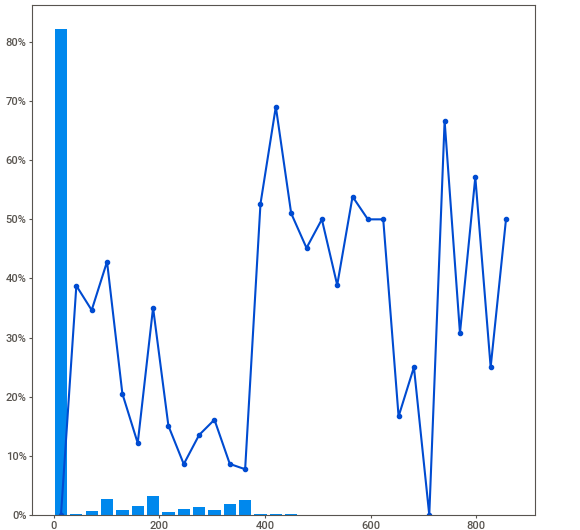
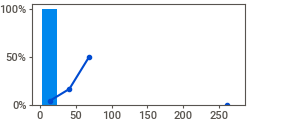
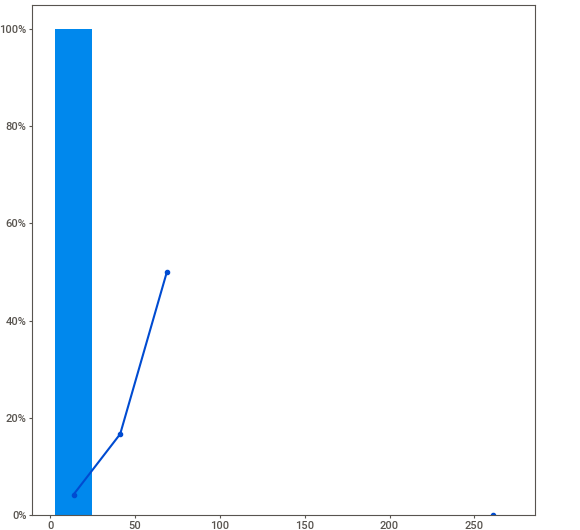
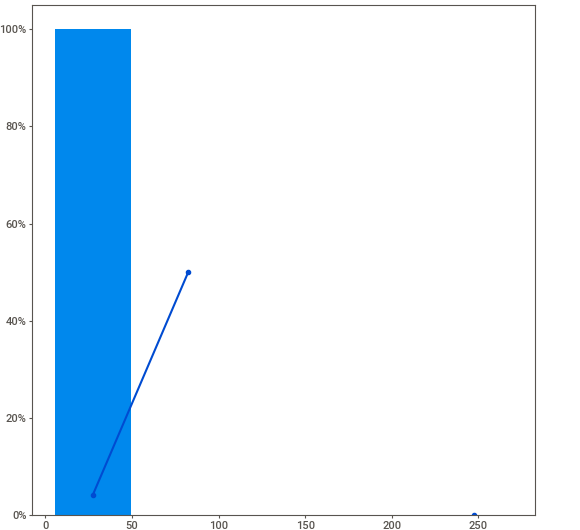
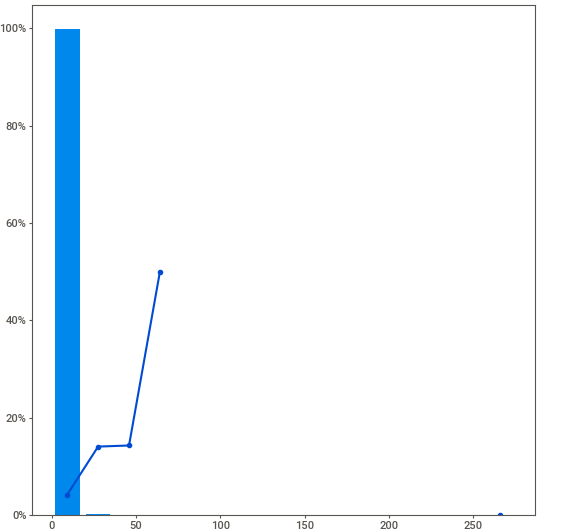
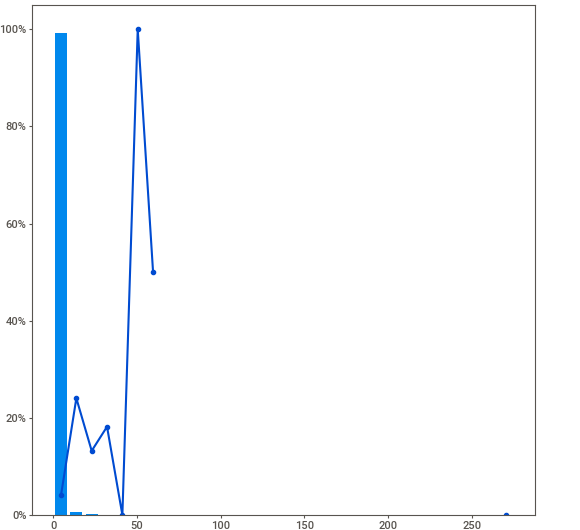
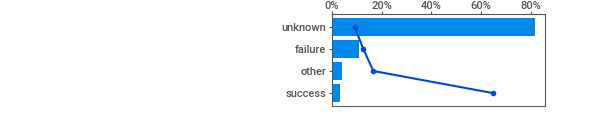
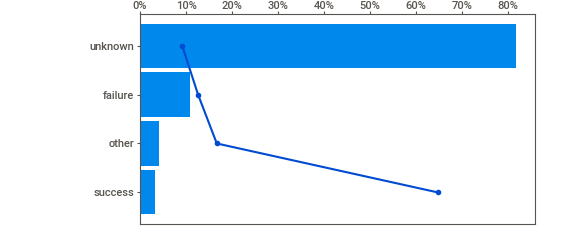
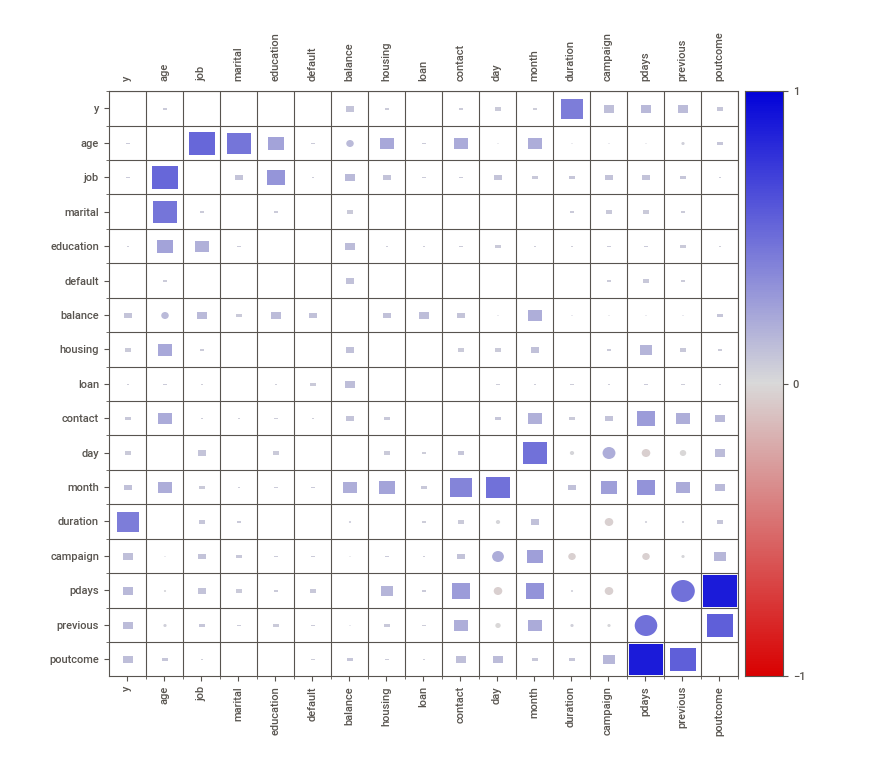
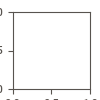

In [8]:
my_report = sv.analyze(train, target_feat="y")
my_report.show_notebook() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [9]:
! pip install ydata-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 33.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.9.3 which is incompatible.


In [10]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [11]:
profile = ProfileReport(train, title="Profiling Report",)

In [12]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Detailed Column Descriptions
bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")
### related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)
### other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Data Preprocess

#### Age

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [16]:
train.age

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64

#### job


In [17]:
train.job

0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
train = pd.get_dummies(train, columns = ["job"], prefix = ["job"])
train

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,tertiary,no,2143,yes,no,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,no,29,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,no,2,yes,yes,unknown,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,no,1506,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,no,1,no,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,no,825,no,no,cellular,17,nov,...,0,0,0,0,0,0,0,1,0,0
45207,71,divorced,primary,no,1729,no,no,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45208,72,married,secondary,no,5715,no,no,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45209,57,married,secondary,no,668,no,no,telephone,17,nov,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   marital            45211 non-null  object
 2   education          45211 non-null  object
 3   default            45211 non-null  object
 4   balance            45211 non-null  int64 
 5   housing            45211 non-null  object
 6   loan               45211 non-null  object
 7   contact            45211 non-null  object
 8   day                45211 non-null  int64 
 9   month              45211 non-null  object
 10  duration           45211 non-null  int64 
 11  campaign           45211 non-null  int64 
 12  pdays              45211 non-null  int64 
 13  previous           45211 non-null  int64 
 14  poutcome           45211 non-null  object
 15  y                  45211 non-null  object
 16  job_admin.         45211 non-null  uint8

#### marital    

In [21]:
train.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [22]:
train = pd.get_dummies(train, columns = ["marital"], prefix = ["marital"])
train

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,yes,no,unknown,5,may,261,...,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,yes,no,unknown,5,may,151,...,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,yes,yes,unknown,5,may,76,...,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,yes,no,unknown,5,may,92,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,no,no,unknown,5,may,198,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,no,825,no,no,cellular,17,nov,977,...,0,0,0,0,1,0,0,0,1,0
45207,71,primary,no,1729,no,no,cellular,17,nov,456,...,1,0,0,0,0,0,0,1,0,0
45208,72,secondary,no,5715,no,no,cellular,17,nov,1127,...,1,0,0,0,0,0,0,0,1,0
45209,57,secondary,no,668,no,no,telephone,17,nov,508,...,0,0,0,0,0,0,0,0,1,0


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  object
 2   default            45211 non-null  object
 3   balance            45211 non-null  int64 
 4   housing            45211 non-null  object
 5   loan               45211 non-null  object
 6   contact            45211 non-null  object
 7   day                45211 non-null  int64 
 8   month              45211 non-null  object
 9   duration           45211 non-null  int64 
 10  campaign           45211 non-null  int64 
 11  pdays              45211 non-null  int64 
 12  previous           45211 non-null  int64 
 13  poutcome           45211 non-null  object
 14  y                  45211 non-null  object
 15  job_admin.         45211 non-null  uint8 
 16  job_blue-collar    45211 non-null  uint8

#### education

In [24]:
train.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [25]:
education_map = {"secondary": 2, "tertiary":3, "primary":1, "unknown":0}


In [26]:
train.education = train.education.map(education_map)
train.education

0        3
1        2
2        2
3        0
4        0
        ..
45206    3
45207    1
45208    2
45209    2
45210    2
Name: education, Length: 45211, dtype: int64

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  int64 
 2   default            45211 non-null  object
 3   balance            45211 non-null  int64 
 4   housing            45211 non-null  object
 5   loan               45211 non-null  object
 6   contact            45211 non-null  object
 7   day                45211 non-null  int64 
 8   month              45211 non-null  object
 9   duration           45211 non-null  int64 
 10  campaign           45211 non-null  int64 
 11  pdays              45211 non-null  int64 
 12  previous           45211 non-null  int64 
 13  poutcome           45211 non-null  object
 14  y                  45211 non-null  object
 15  job_admin.         45211 non-null  uint8 
 16  job_blue-collar    45211 non-null  uint8

#### default            

In [28]:
train.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

<Axes: >

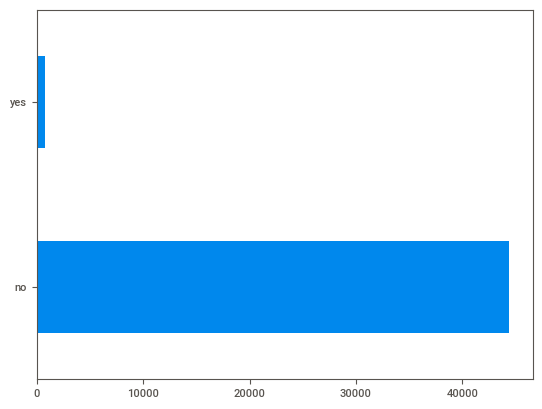

In [29]:
train.default.value_counts().plot.barh()

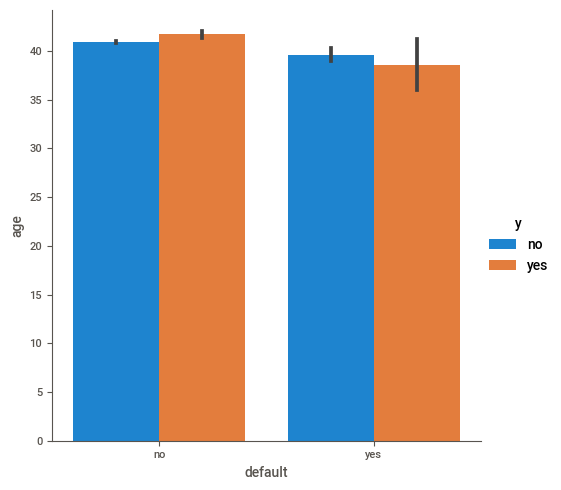

In [30]:
sns.catplot(x = "default", y = "age", hue="y",data = train, kind = "bar")

In [31]:
train = pd.get_dummies(train, columns = ["default"], prefix = ["default"])
train

,age,education,balance,housing,loan,contact,day,month,duration,campaign,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,default_no,default_yes
0,58,3,2143,yes,no,unknown,5,may,261,1,...,0,0,0,0,0,0,1,0,1,0
1,44,2,29,yes,no,unknown,5,may,151,1,...,0,0,1,0,0,0,0,1,1,0
2,33,2,2,yes,yes,unknown,5,may,76,1,...,0,0,0,0,0,0,1,0,1,0
3,47,0,1506,yes,no,unknown,5,may,92,1,...,0,0,0,0,0,0,1,0,1,0
4,33,0,1,no,no,unknown,5,may,198,1,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,825,no,no,cellular,17,nov,977,3,...,0,0,1,0,0,0,1,0,1,0
45207,71,1,1729,no,no,cellular,17,nov,456,2,...,0,0,0,0,0,1,0,0,1,0
45208,72,2,5715,no,no,cellular,17,nov,1127,5,...,0,0,0,0,0,0,1,0,1,0
45209,57,2,668,no,no,telephone,17,nov,508,4,...,0,0,0,0,0,0,1,0,1,0


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  int64 
 2   balance            45211 non-null  int64 
 3   housing            45211 non-null  object
 4   loan               45211 non-null  object
 5   contact            45211 non-null  object
 6   day                45211 non-null  int64 
 7   month              45211 non-null  object
 8   duration           45211 non-null  int64 
 9   campaign           45211 non-null  int64 
 10  pdays              45211 non-null  int64 
 11  previous           45211 non-null  int64 
 12  poutcome           45211 non-null  object
 13  y                  45211 non-null  object
 14  job_admin.         45211 non-null  uint8 
 15  job_blue-collar    45211 non-null  uint8 
 16  job_entrepreneur   45211 non-null  uint8

#### Balance

In [33]:
train.balance.value_counts()

 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

/tmp/ipykernel_32/1045559170.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.balance, bins = 10, kde = False)


<Axes: xlabel='balance'>

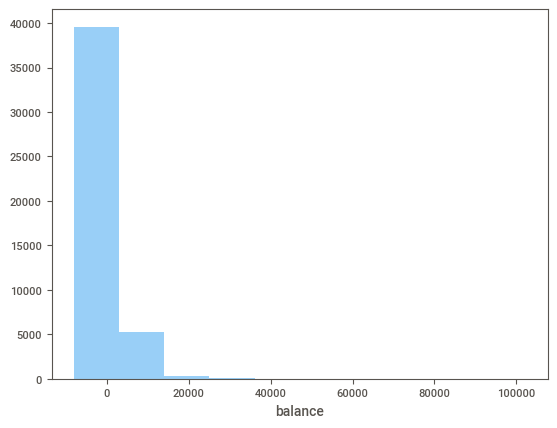

In [34]:
sns.distplot(train.balance, bins = 10, kde = False)

<Axes: xlabel='balance'>

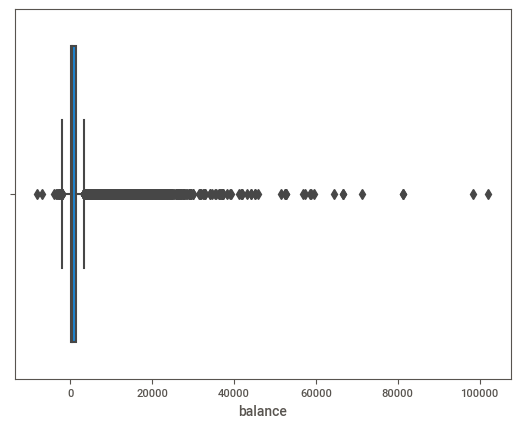

In [35]:
sns.boxplot(x = train["balance"])

#### Housing

In [36]:
train.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [37]:
train = pd.get_dummies(train, columns = ["housing"], prefix = ["housing"])
train

,age,education,balance,loan,contact,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes
0,58,3,2143,no,unknown,5,may,261,1,-1,...,0,0,0,0,1,0,1,0,0,1
1,44,2,29,no,unknown,5,may,151,1,-1,...,1,0,0,0,0,1,1,0,0,1
2,33,2,2,yes,unknown,5,may,76,1,-1,...,0,0,0,0,1,0,1,0,0,1
3,47,0,1506,no,unknown,5,may,92,1,-1,...,0,0,0,0,1,0,1,0,0,1
4,33,0,1,no,unknown,5,may,198,1,-1,...,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,825,no,cellular,17,nov,977,3,-1,...,1,0,0,0,1,0,1,0,1,0
45207,71,1,1729,no,cellular,17,nov,456,2,-1,...,0,0,0,1,0,0,1,0,1,0
45208,72,2,5715,no,cellular,17,nov,1127,5,184,...,0,0,0,0,1,0,1,0,1,0
45209,57,2,668,no,telephone,17,nov,508,4,-1,...,0,0,0,0,1,0,1,0,1,0


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  int64 
 2   balance            45211 non-null  int64 
 3   loan               45211 non-null  object
 4   contact            45211 non-null  object
 5   day                45211 non-null  int64 
 6   month              45211 non-null  object
 7   duration           45211 non-null  int64 
 8   campaign           45211 non-null  int64 
 9   pdays              45211 non-null  int64 
 10  previous           45211 non-null  int64 
 11  poutcome           45211 non-null  object
 12  y                  45211 non-null  object
 13  job_admin.         45211 non-null  uint8 
 14  job_blue-collar    45211 non-null  uint8 
 15  job_entrepreneur   45211 non-null  uint8 
 16  job_housemaid      45211 non-null  uint8

#### Loan

In [39]:
train.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [40]:
train = pd.get_dummies(train, columns = ["loan"], prefix = ["loan"])
train

,age,education,balance,contact,day,month,duration,campaign,pdays,previous,...,job_unknown,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,3,2143,unknown,5,may,261,1,-1,0,...,0,0,1,0,1,0,0,1,1,0
1,44,2,29,unknown,5,may,151,1,-1,0,...,0,0,0,1,1,0,0,1,1,0
2,33,2,2,unknown,5,may,76,1,-1,0,...,0,0,1,0,1,0,0,1,0,1
3,47,0,1506,unknown,5,may,92,1,-1,0,...,0,0,1,0,1,0,0,1,1,0
4,33,0,1,unknown,5,may,198,1,-1,0,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,825,cellular,17,nov,977,3,-1,0,...,0,0,1,0,1,0,1,0,1,0
45207,71,1,1729,cellular,17,nov,456,2,-1,0,...,0,1,0,0,1,0,1,0,1,0
45208,72,2,5715,cellular,17,nov,1127,5,184,3,...,0,0,1,0,1,0,1,0,1,0
45209,57,2,668,telephone,17,nov,508,4,-1,0,...,0,0,1,0,1,0,1,0,1,0


#### Contact

In [41]:
train.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [42]:
train = pd.get_dummies(train, columns = ["contact"], prefix = ["contact"])
train

,age,education,balance,day,month,duration,campaign,pdays,previous,poutcome,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,58,3,2143,5,may,261,1,-1,0,unknown,...,0,1,0,0,1,1,0,0,0,1
1,44,2,29,5,may,151,1,-1,0,unknown,...,1,1,0,0,1,1,0,0,0,1
2,33,2,2,5,may,76,1,-1,0,unknown,...,0,1,0,0,1,0,1,0,0,1
3,47,0,1506,5,may,92,1,-1,0,unknown,...,0,1,0,0,1,1,0,0,0,1
4,33,0,1,5,may,198,1,-1,0,unknown,...,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,825,17,nov,977,3,-1,0,unknown,...,0,1,0,1,0,1,0,1,0,0
45207,71,1,1729,17,nov,456,2,-1,0,unknown,...,0,1,0,1,0,1,0,1,0,0
45208,72,2,5715,17,nov,1127,5,184,3,success,...,0,1,0,1,0,1,0,1,0,0
45209,57,2,668,17,nov,508,4,-1,0,unknown,...,0,1,0,1,0,1,0,0,1,0


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  int64 
 2   balance            45211 non-null  int64 
 3   day                45211 non-null  int64 
 4   month              45211 non-null  object
 5   duration           45211 non-null  int64 
 6   campaign           45211 non-null  int64 
 7   pdays              45211 non-null  int64 
 8   previous           45211 non-null  int64 
 9   poutcome           45211 non-null  object
 10  y                  45211 non-null  object
 11  job_admin.         45211 non-null  uint8 
 12  job_blue-collar    45211 non-null  uint8 
 13  job_entrepreneur   45211 non-null  uint8 
 14  job_housemaid      45211 non-null  uint8 
 15  job_management     45211 non-null  uint8 
 16  job_retired        45211 non-null  uint8

#### Day

In [44]:
train.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

#### month ???

In [45]:
train.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

#### duration

In [46]:
train.duration.value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64

#### campaign

In [47]:
train.campaign.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

#### pdays

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  int64 
 2   balance            45211 non-null  int64 
 3   day                45211 non-null  int64 
 4   month              45211 non-null  object
 5   duration           45211 non-null  int64 
 6   campaign           45211 non-null  int64 
 7   pdays              45211 non-null  int64 
 8   previous           45211 non-null  int64 
 9   poutcome           45211 non-null  object
 10  y                  45211 non-null  object
 11  job_admin.         45211 non-null  uint8 
 12  job_blue-collar    45211 non-null  uint8 
 13  job_entrepreneur   45211 non-null  uint8 
 14  job_housemaid      45211 non-null  uint8 
 15  job_management     45211 non-null  uint8 
 16  job_retired        45211 non-null  uint8

In [49]:
train.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [50]:
for i in range(45211):
    if train.pdays[i] ==-1:
        train.pdays[i] = 0
    else:
        train.pdays[i]=1
    



/tmp/ipykernel_32/1554785393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.pdays[i] = 0
/tmp/ipykernel_32/1554785393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.pdays[i]=1


In [51]:
train.pdays.value_counts()

0    36954
1     8257
Name: pdays, dtype: int64

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  int64 
 2   balance            45211 non-null  int64 
 3   day                45211 non-null  int64 
 4   month              45211 non-null  object
 5   duration           45211 non-null  int64 
 6   campaign           45211 non-null  int64 
 7   pdays              45211 non-null  int64 
 8   previous           45211 non-null  int64 
 9   poutcome           45211 non-null  object
 10  y                  45211 non-null  object
 11  job_admin.         45211 non-null  uint8 
 12  job_blue-collar    45211 non-null  uint8 
 13  job_entrepreneur   45211 non-null  uint8 
 14  job_housemaid      45211 non-null  uint8 
 15  job_management     45211 non-null  uint8 
 16  job_retired        45211 non-null  uint8

#### previous

In [53]:
train.previous.value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

In [54]:
for i in range(45211):
    if train.previous[i] !=0:
        train.previous[i] = 1

/tmp/ipykernel_32/311481987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.previous[i] = 1


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  int64 
 2   balance            45211 non-null  int64 
 3   day                45211 non-null  int64 
 4   month              45211 non-null  object
 5   duration           45211 non-null  int64 
 6   campaign           45211 non-null  int64 
 7   pdays              45211 non-null  int64 
 8   previous           45211 non-null  int64 
 9   poutcome           45211 non-null  object
 10  y                  45211 non-null  object
 11  job_admin.         45211 non-null  uint8 
 12  job_blue-collar    45211 non-null  uint8 
 13  job_entrepreneur   45211 non-null  uint8 
 14  job_housemaid      45211 non-null  uint8 
 15  job_management     45211 non-null  uint8 
 16  job_retired        45211 non-null  uint8

#### poutcome 

In [56]:
train.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [57]:
poutcome_map = {"unknown":0}

In [58]:
train.poutcome = np.where(train.poutcome.str.contains("success"), 1, 0) # "Sun" degerine 1 geri kalana 0 atar


In [59]:
train.poutcome.value_counts()

0    43700
1     1511
Name: poutcome, dtype: int64

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  int64 
 2   balance            45211 non-null  int64 
 3   day                45211 non-null  int64 
 4   month              45211 non-null  object
 5   duration           45211 non-null  int64 
 6   campaign           45211 non-null  int64 
 7   pdays              45211 non-null  int64 
 8   previous           45211 non-null  int64 
 9   poutcome           45211 non-null  int64 
 10  y                  45211 non-null  object
 11  job_admin.         45211 non-null  uint8 
 12  job_blue-collar    45211 non-null  uint8 
 13  job_entrepreneur   45211 non-null  uint8 
 14  job_housemaid      45211 non-null  uint8 
 15  job_management     45211 non-null  uint8 
 16  job_retired        45211 non-null  uint8

#### y

In [61]:
train.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [62]:
y_map = {"no":0, "yes":1}

In [63]:
train.y = train.y.map(y_map)
train.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  int64 
 2   balance            45211 non-null  int64 
 3   day                45211 non-null  int64 
 4   month              45211 non-null  object
 5   duration           45211 non-null  int64 
 6   campaign           45211 non-null  int64 
 7   pdays              45211 non-null  int64 
 8   previous           45211 non-null  int64 
 9   poutcome           45211 non-null  int64 
 10  y                  45211 non-null  int64 
 11  job_admin.         45211 non-null  uint8 
 12  job_blue-collar    45211 non-null  uint8 
 13  job_entrepreneur   45211 non-null  uint8 
 14  job_housemaid      45211 non-null  uint8 
 15  job_management     45211 non-null  uint8 
 16  job_retired        45211 non-null  uint8

In [65]:
train = train.drop(["month"], axis = 1)
train

,age,education,balance,day,duration,campaign,pdays,previous,poutcome,y,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,58,3,2143,5,261,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
1,44,2,29,5,151,1,0,0,0,0,...,1,1,0,0,1,1,0,0,0,1
2,33,2,2,5,76,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,47,0,1506,5,92,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
4,33,0,1,5,198,1,0,0,0,0,...,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,825,17,977,3,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
45207,71,1,1729,17,456,2,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
45208,72,2,5715,17,1127,5,1,1,1,1,...,0,1,0,1,0,1,0,1,0,0
45209,57,2,668,17,508,4,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0


## modelling

In [66]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [67]:
y = train["y"]
X = train.drop(["y"], axis = 1)

In [68]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [69]:
y_pred = loj_model.predict(X)

In [70]:
confusion_matrix(y, y_pred)

array([[39010,   912],
       [ 3590,  1699]])

In [71]:
accuracy_score(y, y_pred)

0.9004224635597532

In [72]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.89     45211



In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [76]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [77]:
accuracy_score(y_test, loj_model.predict(X_test))

0.8979916836238166

In [78]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean() # cv ile ideal accuracy_score

0.8980818134159605

### Naive Bayes

In [79]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)

In [80]:
y_pred = nb_model.predict(X_test)

In [81]:
accuracy_score(y_test, y_pred)

0.8337609484207732

In [82]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean() # dogrulanmis test skorumuz

0.8433174495121399

### KNN

In [83]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [84]:
y_pred = knn_model.predict(X_test)

In [85]:
accuracy_score(y_test, y_pred)

0.8731310271609307

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      9950
           1       0.44      0.21      0.28      1353

    accuracy                           0.87     11303
   macro avg       0.67      0.58      0.60     11303
weighted avg       0.84      0.87      0.85     11303



In [87]:
knn_params = {'n_neighbors':np.arange(1,10)}

In [88]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [89]:
knn_cv.best_params_

{'n_neighbors': 8}

In [90]:
knn_cv.best_score_

0.8851010091783822

In [91]:
knn_tuned = KNeighborsClassifier(n_neighbors = 8)
knn_tuned.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [92]:
knn_tuned.score(X_test, y_test)

0.8785278244713792

In [93]:
y_pred = knn_tuned.predict(X_test)

In [94]:
accuracy_score(y_test, y_pred)

0.8785278244713792

### SVC

In [98]:
svc_params = { 'C': [0.01, 0.1, 1, 5, 10],
             "gamma": [ 0.01, 0.1, 1, 5, 10]}

In [100]:
svc = SVC()
svc_cv = GridSearchCV(svc, 
                      svc_params, 
                      cv = 5, 
                      n_jobs = -1,
                      verbose = 2 ).fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


KeyboardInterrupt: 

In [ ]:
svc_cv.best_params_

In [ ]:
svc_tuned = SVC(C = , gamma = ).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

### YSA

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [102]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [103]:
from sklearn.neural_network import MLPClassifier

In [104]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [105]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.8931257188357073

In [ ]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [ ]:
mlpc = MLPClassifier()
mlpc_cv = GridSearchCV(mlpc, 
                       mlpc_params, 
                       cv = 10, 
                       n_jobs = -1, 
                       verbose = 2).fit(X_train_scaled,y_train)

In [ ]:
mlpc_cv.best_params_

In [ ]:
mlpc_tuned = MLPClassifier(activation = '',
                          alpha = ,
                          hidden_layer_sizes = (),
                          solver = 'sgd').fit(X_train_scaled, y_train)

In [ ]:
y_pred = mlpc_tuned.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred)

### CART

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [108]:
y_pred = cart_model.predict(X_test)

In [109]:
accuracy_score(y_test, y_pred)

0.8576484119260374

In [ ]:
cart_grid = {'max_depth': range(1,10),
             'min_samples_split': list(range(2,50))
    
}

In [ ]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, 
                       cart_grid, 
                       cv = 10, 
                       n_jobs = -1, 
                       verbose = 2).fit(X_train, y_train)

In [ ]:
cart_cv.best_params_

In [ ]:

cart_tuned = DecisionTreeClassifier(max_depth = 5, 
                                    min_samples_split = 19).fit(X_train, y_train)

In [ ]:
y_pred = cart_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

### Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [112]:
y_pred = rf_model.predict(X_test)

In [113]:
accuracy_score(y_test, y_pred)

0.8970184906661948

In [ ]:
rf_params = {'max_depth': [2,3,5,8,10],
             'max_features': [2,5,8],
             'n_estimators': [10,500,1000],
             'min_samples_split': [2,5,10]
    
}

In [ ]:

rf_model = RandomForestClassifier()
rf_cv = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
rf_cv.best_params_

In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 10,
                                 max_features = 8,
                                 min_samples_split = 5,
                                 n_estimators = 1000).fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

### GBM

In [114]:
from sklearn.ensemble import GradientBoostingClassifier

In [126]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [127]:
y_pred = gbm_model.predict(X_test)

In [128]:
accuracy_score(y_test, y_pred)

0.8991418207555516

In [129]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,200,300],
             "max_depth": [3,5,7],
             "min_samples_split": [2,5,10]}

In [ ]:
gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train,y_train)

In [ ]:

gbm_cv.best_params_

In [ ]:
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.01, 
                                       max_depth = 5, 
                                       min_samples_split = 2, 
                                       n_estimators = 500).fit(X_train,y_train)

In [ ]:

y_pred = gbm_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

### XGBoost

In [119]:
from xgboost import XGBClassifier

In [130]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [131]:
y_pred = xgb_model.predict(X_test)

In [132]:
accuracy_score(y_test, y_pred)


0.8991418207555516

In [ ]:
xgb_params = {
        'n_estimators': [100, 200, 300, 400],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [ ]:
xgb = XGBClassifier()
xgb_cv = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
xgb_tuned = XGBClassifier(learning_rate = 0.02, 
                          max_depth = 3, 
                          min_samples_split = 2, 
                          n_estimators = 100, 
                          subsample = 0.06).fit(X_train, y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

### Catboost

In [123]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.046385
0:	learn: 0.6389589	total: 65.6ms	remaining: 1m 5s
1:	learn: 0.5902907	total: 75ms	remaining: 37.4s
2:	learn: 0.5475742	total: 82.7ms	remaining: 27.5s
3:	learn: 0.5089192	total: 90.2ms	remaining: 22.5s
4:	learn: 0.4750043	total: 98ms	remaining: 19.5s
5:	learn: 0.4455261	total: 106ms	remaining: 17.6s
6:	learn: 0.4198388	total: 114ms	remaining: 16.2s
7:	learn: 0.3994553	total: 122ms	remaining: 15.1s
8:	learn: 0.3819828	total: 130ms	remaining: 14.3s
9:	learn: 0.3658024	total: 138ms	remaining: 13.6s
10:	learn: 0.3511402	total: 146ms	remaining: 13.1s
11:	learn: 0.3382714	total: 153ms	remaining: 12.6s
12:	learn: 0.3292312	total: 161ms	remaining: 12.2s
13:	learn: 0.3185886	total: 169ms	remaining: 11.9s
14:	learn: 0.3092743	total: 177ms	remaining: 11.6s
15:	learn: 0.3005494	total: 186ms	remaining: 11.5s
16:	learn: 0.2934367	total: 195ms	remaining: 11.3s
17:	learn: 0.2885294	total: 203ms	remaining: 11.1s
18:	learn: 0.2829254	total: 211ms	remaining: 10.9s
19:	learn:

In [124]:
y_pred = cat_model.predict(X_test)

In [125]:
accuracy_score(y_test, y_pred)

0.8969300185791382

### Fınal model is xgboost

In [135]:
xgb_params = {
        'n_estimators': [5, 7, 10],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.1,0.01,0.001],
        "min_samples_split": [2,3,5]}

In [136]:
xgb = XGBClassifier()
xgb_cv = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
[19:29:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=5, subsample=0.6; total time=   0.5s
[19:29:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=5, subsample=0.6; total time=   0.6s
[19:29:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=5, subsample=0.6; total time=   0.5s
[19:29:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=5, subsample=0.8; total time=   0.5s
[19:29:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END lea

In [137]:
xgb_tuned = XGBClassifier(learning_rate = 0.02, 
                          max_depth = 3, 
                          min_samples_split = 2, 
                          n_estimators = 100, 
                          subsample = 0.06).fit(X_train, y_train)

[19:37:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



In [138]:
y_pred = xgb_tuned.predict(X_test)

In [139]:
accuracy_score(y_test, y_pred)

0.8984340440590993

[CV] END learning_rate=0.001, max_depth=5, min_samples_split=3, n_estimators=10, subsample=1.0; total time=   1.1s
[19:36:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END learning_rate=0.001, max_depth=5, min_samples_split=3, n_estimators=10, subsample=1.0; total time=   1.0s
[19:36:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END learning_rate=0.001, max_depth=5, min_samples_split=5, n_estimators=5, subsample=0.6; total time=   0.7s
[19:36:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END learning_rate=0.001, max_depth=5, min_samples_split=5, n_estimators=5, subsample=0.6; total time=   0.7s
[19:36:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END learning_rate=0.001, max_depth=5, min_samples_split=5, n_estimators=5, subsample=0.8; total time=   0.7s
[19:36:57] WARNING: ../src/learner.cc:767: 
Para